# Linear Regression on the winequality-red Dataseet [40% points]

***

### Name: Rishang Prashnani  


***

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## importing the dataset

In [2]:
wine = pd.read_csv("/Users/rishangprashnani/Library/Mobile Documents/com~apple~CloudDocs/Class work/Machine learning /coding assignment 1/datasets/winequality-red.csv")

***

# Main Statistics and information about the wine quality dataset

***

## Top rows of the dataframe (general idea of the dataframe)

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Number of rows and columns (shape)

In [4]:
print("No. of rows and columns", wine.shape)

No. of rows and columns (1599, 12)


### Name of all the columns 

In [5]:
print(wine.columns.values)

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol' 'quality']


### pH is our output value (y-value)**

### Rest are the attributes/features  (x-value)**

### Size of the dataframe ( no. of elements)

In [6]:
wine.size

19188

### Main Statistics

In [7]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### A concise summary of a DataFrame

In [8]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**shows memory usage, dtypes, column names and non-null count for each column**

### No. of null values each column

In [9]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

***There are no null values for any column***

## Dropping duplicates

In [10]:
print("len of dataframe before dropping duplicates", len(wine))

wine = wine.drop_duplicates()

print("length of dataframe after dropping duplicates", len(wine))

len of dataframe before dropping duplicates 1599
length of dataframe after dropping duplicates 1359


# Choosing the target variable

After analyzing the data, I found out that the \textit{quality} attribute although a range variable, seems to be categorical. Therefore applying regression model to a categorical value seems unintuitve.\\
\\
Hence, I tried choosing the target variable which has the \textit{least dependency} on the other variable so that I get the most independent variable as target value.
To calculate this, first I created the co-relation matrix and calculated the abs sum of it to find the collective co relation of each variable with others. After taking the step , It was found that feature with the least co relation are \textit{residual sugar}. Putting that as the target variable did not give good accuracy as expected, hence after trial and error, {pH} seems to be giving the best accuracy.

In [11]:
# showing that quality is categorical

wine['quality'].value_counts()

quality
5    577
6    535
7    167
4     53
8     17
3     10
Name: count, dtype: int64

### Correlation 

In [12]:
correlation = wine.corr()


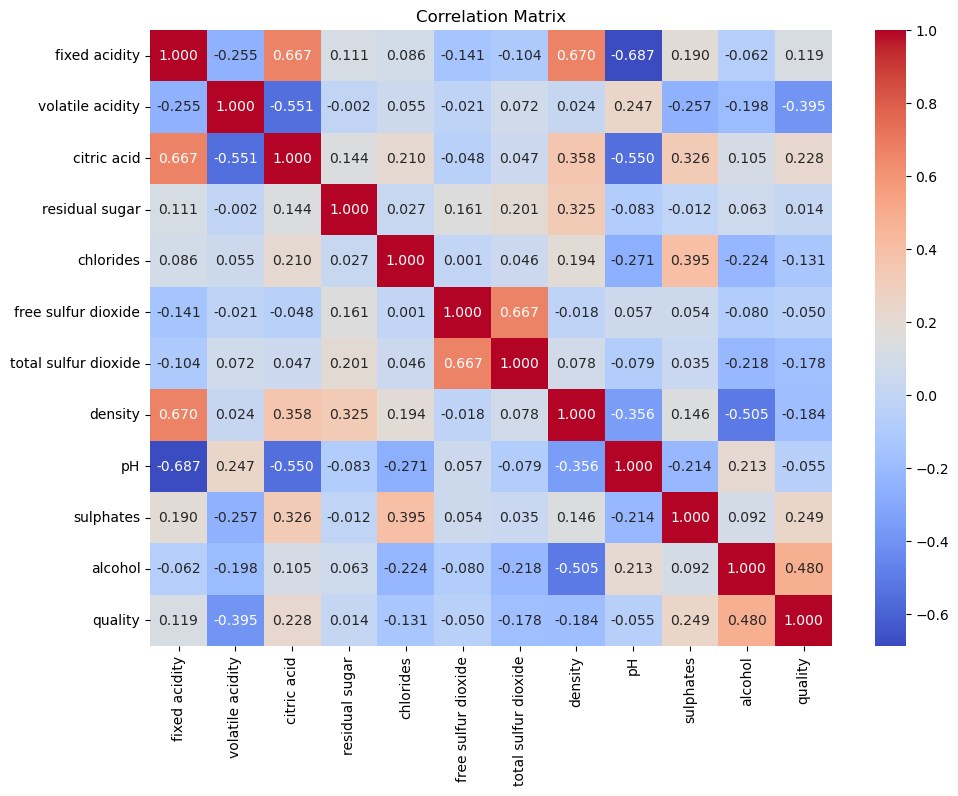

In [13]:
plt.figure(figsize=(11, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".3f")
plt.title("Correlation Matrix")
plt.show()

In [14]:
corr_sum = correlation.abs().sum(axis=1)
corr_sum

fixed acidity           4.091600
volatile acidity        3.077649
citric acid             4.235633
residual sugar          2.142012
chlorides               2.638267
free sulfur dioxide     2.297467
total sulfur dioxide    2.725267
density                 3.857326
pH                      3.812445
sulphates               2.969716
alcohol                 3.239951
quality                 3.083917
dtype: float64

### using this information did not give us good accuracy, pH is used

***

# Applying linear regression ( quality removed, pH as target)

***

### all the attributes except quality and alcohol our features (x-value)

In [33]:
X = np.array(wine.drop(['quality', 'pH'],axis=1))
X

array([[ 7.4    ,  0.7    ,  0.     , ...,  0.9978 ,  0.56   ,  9.4    ],
       [ 7.8    ,  0.88   ,  0.     , ...,  0.9968 ,  0.68   ,  9.8    ],
       [ 7.8    ,  0.76   ,  0.04   , ...,  0.997  ,  0.65   ,  9.8    ],
       ...,
       [ 5.9    ,  0.55   ,  0.1    , ...,  0.99512,  0.76   , 11.2    ],
       [ 5.9    ,  0.645  ,  0.12   , ...,  0.99547,  0.71   , 10.2    ],
       [ 6.     ,  0.31   ,  0.47   , ...,  0.99549,  0.66   , 11.     ]])

In [34]:
print("Shape of input", X.shape)

Shape of input (1359, 10)


### alcohol column is our target output (y-value)

In [35]:
Y = np.array(wine['pH'])
Y

array([3.51, 3.2 , 3.26, ..., 3.52, 3.57, 3.39])

In [36]:
print("Shape of output", Y.shape)

Shape of output (1359,)


## Creating training and test datasets ( 80 : 20 ratio )

In [37]:
print("size of train", int(len(X)*0.8))  

size of train 1087


In [38]:
x_train, y_train = X[:1087], Y[:1087]


In [39]:
print("Shape of x_train, y_train", x_train.shape,'and', y_train.shape)

Shape of x_train, y_train (1087, 10) and (1087,)


In [40]:
print("Size of test", len(X) - 1087)

Size of test 272


In [41]:
x_test, y_test = X[1087:], Y[1087:]

In [42]:
print("Shape of x_test, y_test", x_test.shape,'and', y_test.shape)

Shape of x_test, y_test (272, 10) and (272,)


# Training: Calculating the weight matrix using closed form solution

**w= (X-transpose * X) ^ -1  * (X-transpose * Y)**

In [43]:
a = np.linalg.inv(np.dot(x_train.T, x_train))

In [44]:
b = np.dot(x_train.T, y_train)

In [45]:
w = np.dot(a, b)
w

array([-5.73050951e-02,  9.43034924e-02, -3.43132503e-02, -4.06325824e-04,
       -5.58242954e-01,  1.84209693e-03, -8.96142390e-04,  3.63565887e+00,
       -8.48723473e-03,  1.87891469e-02])

***

# Testing: Finding predictions and MSE on test data using learnt w

In [46]:
sq_error = 0
prediction = []

In [47]:
for inp, out in zip(x_test, y_test):
    
    predicted = np.dot( w.T, inp)
    prediction.append(predicted)
    
    sq_error += ( out - predicted )**2
    

MSE = sq_error/len(y_test)

In [48]:
print("Mean square error", round(MSE, 3))

Mean square error 0.01


### Mean square error is 0.01

# Graph

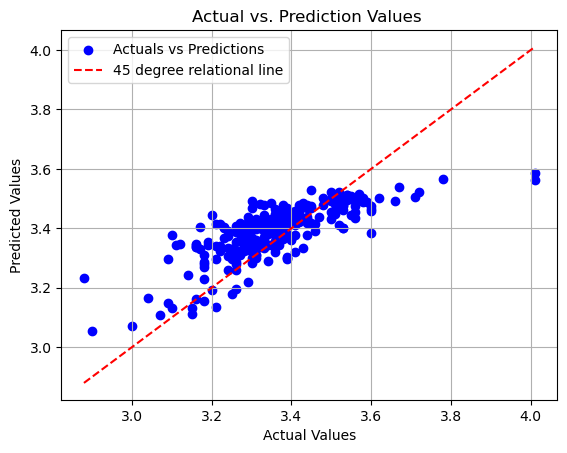

In [50]:

plt.scatter(y_test, prediction, color='blue', marker='o', label='Actuals vs Predictions')


plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='45 degree relational line',)



plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Prediction Values ')
plt.legend()

plt.grid()
plt.show()
